## Практическое задание 2: Программирование собственной линейной модели

---

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Определение модели

In [64]:
class MyLinearModel():
    
    def __init__(self):
        print('Linear Model created.')
        
    def fit_simple_regression(self, X, Y, delta, nstep):
        # Теория: Y = beta_0 + beta_1 * X
        # X, Y -- векторы
        
        # Начальные значения
        beta_0 = 1
        beta_1 = 0
        
        for i in range(nstep):
            Y_hat = beta_0 + beta_1 * X
            mse = self.calculate_MSE(Y, Y_hat)
            
            # beta_0
            beta_0_right = beta_0 + delta 
            beta_0_left = beta_0 - delta
            
            Y_hat_0_right = beta_0_right + beta_1 * X
            Y_hat_0_left = beta_0_left + beta_1 * X
            
            mse_0_right = self.calculate_MSE(Y, Y_hat_0_right)
            mse_0_left = self.calculate_MSE(Y, Y_hat_0_left)
            
            if mse_0_right < mse:
                beta_0 = beta_0_right
            elif mse_0_left < mse:
                beta_0 = beta_0_left
                
            # beta_1
            beta_1_right = beta_1 + delta 
            beta_1_left = beta_1 - delta
            
            Y_hat_1_right = beta_0 + beta_1_right * X
            Y_hat_1_left = beta_0 + beta_1_left * X
            
            mse_1_right = self.calculate_MSE(Y, Y_hat_1_right)
            mse_1_left = self.calculate_MSE(Y, Y_hat_1_left)
            
            if mse_1_right < mse:
                beta_1 = beta_1_right
            elif mse_1_left < mse:
                beta_1 = beta_1_left
        # Вне цикла
        self.beta_0 = beta_0
        self.beta_1 = beta_1
        
        return [beta_0, beta_1]
    
    def predict_simple_regression(self, X):
        # Теория: hat(Y) = beta_0 + beta_1 * X
        try:
            return self.beta_0 + self.beta_1 * X
        except:
            print('Модель не обучена.')
            
    def fit_multiple_regression(self, X, Y, delta, nstep):
        # Теория: Y = X @ beta, Y -- вектор, X -- матрица размера nxk, beta -- вектор kx1
        
        # Начальное значение beta
        beta = np.ones(shape = (X.shape[1], 1))
        
        for i in range(nstep):
            Y_hat = X @ beta
            
            # (12, 1) и (12, ) -- по мнению NumPy, это разные вещи
            
            mse = self.calculate_MSE(Y, Y_hat)
            
            beta_new = np.copy(beta)
            i = 0 # индекс коэффициента в векторе beta
            
            for element in beta:
                # Получаю из вектора коэффициентов какой-то коэффициент 
                beta_interest = element
                # Делаю шаг вправо
                beta_interest_right = beta_interest + delta
                
                # Создаю копию вектора коэффициентов (по программным причинам)
                beta_interest_vec_right = np.copy(beta)
                # Заменяю исследуемый коэффициент на тот, который получили при шаге вправо
                beta_interest_vec_right[i] = beta_interest_right
                
                # Повторяем для шага влево
                beta_interest_vec_left = np.copy(beta)
                beta_interest_vec_left[i] = beta_interest_left
                
                Y_hat_right = X @ beta_interest_vec_right
                Y_hat_left = X @ beta_interest_vec_left
                
                mse_right = self.calculate_MSE(Y, Y_hat_right)
                mse_left = self.calculate_MSE(Y, Y_hat_left)
                
                if float(mse_right) < float(mse):
                    beta_new[i] = beta_interest_right
                if float(mse_left) < float(mse):
                    beta_new[i] = beta_interest_left
                i += 1
            beta = np.copy(beta_new)
        self.beta = beta
        return beta
        
    def calculate_MSE(self, Y, Y_hat):
        # Y, hat(Y) -- векторы
        # Теория: MSE = mean((Y - hat(Y))^2)
        return np.mean((Y - Y_hat)**2)

In [7]:
model = MyLinearModel()

Linear Model created.


#### Генерация случайных данных

In [29]:
np.random.seed(123)
# Генерирует 100 случайных целых чисел от 1 до 100
X = np.random.randint(1, 100, 100)
Y = 3 + 2 * X
#  Добавим в Y нормально распределённые возмущения eps
# Y = beta_0 + beta_1 * X + u
# u = eps
eps = np.random.normal(0, 1, 100)
Y = Y + 6 * eps

In [ ]:
plt.hist(eps, bins=100)

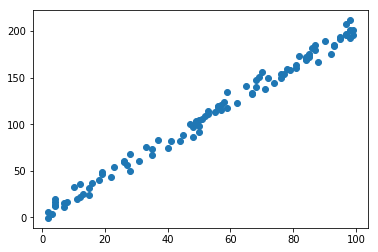

In [30]:
plt.scatter(X, Y)

#### Парная регрессия

In [56]:
model_simple = MyLinearModel()

Linear Model created.


In [57]:
model_simple.fit_simple_regression(X, Y, 0.01, nstep = 10000)

[3.2299999999999747, 2.0000000000000013]

In [58]:
pred = model_simple.predict_simple_regression(X)

In [55]:
# Если модель не обучили, но пытаемся предсказать
model_simple.predict_simple_regression(X)

Модель не обучена.


In [49]:
type(model_simple.beta_0)

AttributeError: 'MyLinearModel' object has no attribute 'beta_0'

In [59]:
pred

array([137.23, 189.23, 201.23,  39.23, 171.23, 119.23, 177.23, 199.23,
       197.23,  99.23, 151.23,  69.23,  97.23, 197.23,  55.23, 171.23,
       161.23,  77.23, 197.23, 165.23, 141.23, 103.23, 115.23, 139.23,
         9.23, 173.23,  83.23, 137.23, 173.23,  99.23, 127.23, 101.23,
        19.23, 189.23, 109.23, 199.23, 175.23, 193.23,  59.23,  73.23,
       199.23, 157.23,  85.23,  11.23, 143.23, 133.23, 155.23,  73.23,
       121.23,  25.23,  49.23, 159.23,  41.23,  35.23,  59.23,  65.23,
       109.23, 145.23,  57.23, 165.23,  17.23,  33.23, 155.23, 113.23,
       147.23,   7.23,  91.23, 121.23, 115.23,  55.23, 105.23, 173.23,
       117.23, 103.23,  29.23,  41.23, 167.23,   7.23, 107.23,  93.23,
       101.23, 117.23, 187.23, 103.23, 177.23,  11.23, 139.23,  27.23,
        47.23, 183.23, 201.23,  11.23,  27.23,  11.23, 193.23,  17.23,
        23.23, 179.23,  33.23, 171.23])

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(Y, pred)

33.94699565910472

In [62]:
r2_score(Y, pred)

0.9908876603805153

#### Импорт данных `Boston` из `sklearn`

#### Множественная регрессия